In [1]:
import pickle
import numpy as np
from keras.utils import to_categorical
from keras.applications import VGG19, ResNet50, InceptionV3, DenseNet121
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

2024-07-05 04:10:58.921032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 04:10:58.921149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 04:10:59.098984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
with open('/kaggle/input/data-hand-sign/dataset.pickle', 'rb') as f:
    data_dict = pickle.load(f)
X = data_dict['data']
y = data_dict['labels']

In [3]:
# Convert labels to one-hot encoding
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data generator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0
)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

img_height, img_width, channels = X_train.shape[1:]

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(28, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        14,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,410,460 (169.41 MB)

 Trainable params: 44,410,460 (169.41 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_generator,
                    epochs=10,
                    batch_size=32,
                    validation_data=test_generator,
                    verbose=1)

scores = model.evaluate(X_test,y_test, verbose=0)
print(f'Test accuracy: {scores[1] * 100}%')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/138 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.0469 - loss: 37.9707      

I0000 00:00:1720152691.745925     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720152691.767416     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4753 - loss: 9.3765

W0000 00:00:1720152703.194912     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720152704.045711     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.4770 - loss: 9.3296 - val_accuracy: 0.9463 - val_loss: 0.1738
Epoch 2/10


W0000 00:00:1720152706.126133     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9442 - loss: 0.1891 - val_accuracy: 0.9827 - val_loss: 0.0595
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9721 - loss: 0.0953 - val_accuracy: 0.9927 - val_loss: 0.0427
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9783 - loss: 0.0797 - val_accuracy: 0.9845 - val_loss: 0.0526
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9829 - loss: 0.0506 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9901 - loss: 0.0432 - val_accuracy: 0.9918 - val_loss: 0.0275
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9882 - val_loss: 0.0298
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9887 - loss: 0.0391 - val_accuracy: 0.9936 - val_loss: 0.0196
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9933 - loss: 0.0332 - val_accuracy: 0.987

W0000 00:00:1720152778.802869     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test accuracy: 99.08925294876099%


W0000 00:00:1720152779.532928     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


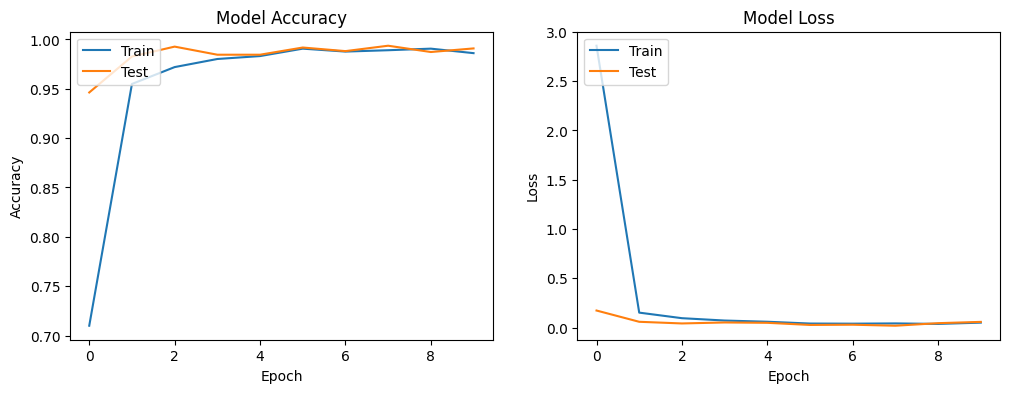

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
    
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
    
plt.show()

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

W0000 00:00:1720152780.746200     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


W0000 00:00:1720152781.397094     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


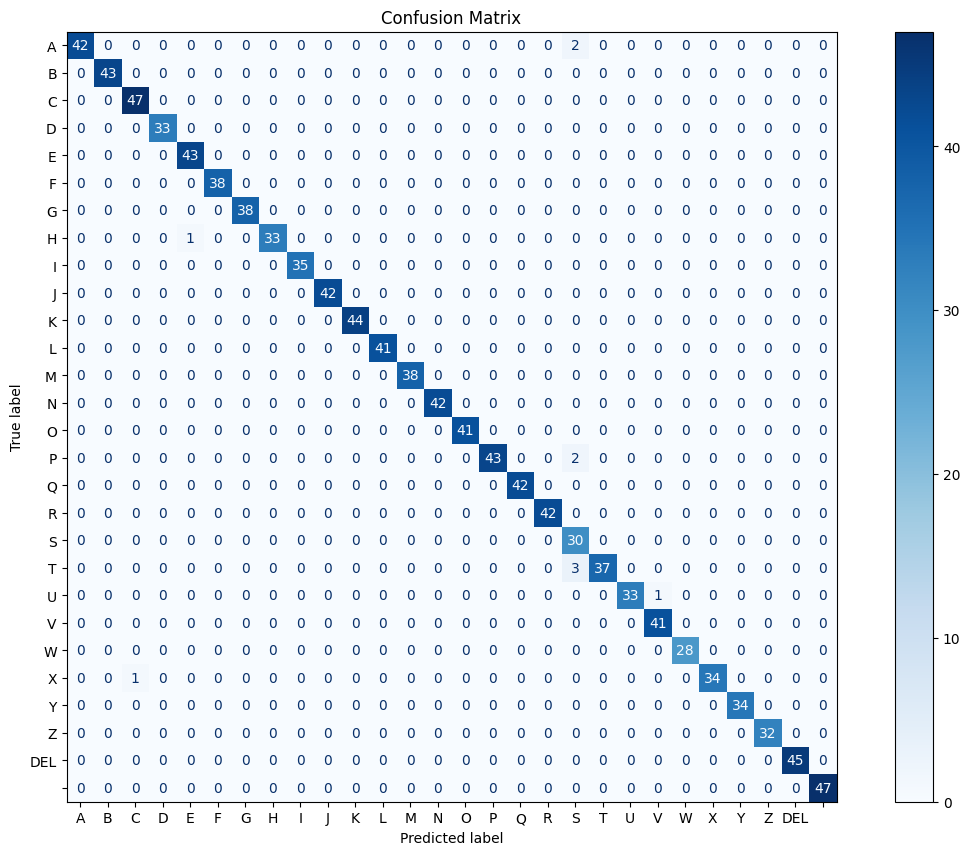

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.95      0.98        44
           B       1.00      1.00      1.00        43
           C       0.98      1.00      0.99        47
           D       1.00      1.00      1.00        33
           E       0.98      1.00      0.99        43
           F       1.00      1.00      1.00        38
           G       1.00      1.00      1.00        38
           H       1.00      0.97      0.99        34
           I       1.00      1.00      1.00        35
           J       1.00      1.00      1.00        42
           K       1.00      1.00      1.00        44
           L       1.00      1.00      1.00        41
           M       1.00      1.00      1.00        38
           N       1.00      1.00      1.00        42
           O       1.00      1.00      1.00        41
           P       1.00      0.96      0.98        45
           Q       1.00      1.00      1.00        42
    

In [8]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define the labels
labels_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DEL', ' ']

# Plot confusion matrix with custom colors and labels
fig, ax = plt.subplots(figsize=(15, 10))
cmap = plt.get_cmap('Blues')  # Use 'Blues' colormap
cmd = ConfusionMatrixDisplay(cm, display_labels=labels_list)
cmd.plot(ax=ax, cmap=cmap)

# Set the background color to white
ax.set_facecolor('white')

plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=labels_list))

In [9]:
model.save('hand_gesture_cnn_model.h5')

In [10]:
# Function to build and train models
def build_and_train_model(base_model, model_name):
    # Build model on top of base_model
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze base_model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(train_generator,
                    epochs=10,
                    batch_size = 32,
                    validation_data=test_generator,
                    verbose=1)
    
    # Evaluate model
    scores = model.evaluate(test_generator, verbose=0)
    print(f'{model_name} Test accuracy: {scores[1] * 100}%')
    
    # Save model
    model.save(f'{model_name}_model.h5')
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()
    
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot confusion matrix with custom colors and labels
    fig, ax = plt.subplots(figsize=(15, 10))
    cmap = plt.get_cmap('Blues')  # Use 'Blues' colormap
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels_list)
    cmd.plot(ax=ax, cmap=cmap)

    # Set the background color to white
    ax.set_facecolor('white')

    plt.title('Confusion Matrix')
    plt.show()
    
    # Print classification report
    print('Classification Report:')
    print(classification_report(y_true, y_pred_classes, target_names=labels_list))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
  1/138 ━━━━━━━━━━━━━━━━━━━━ 1:19:27 35s/step - accuracy: 0.0312 - loss: 13.4442

W0000 00:00:1720152819.701909     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6209 - loss: 5.1710

W0000 00:00:1720152848.142564     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 333ms/step - accuracy: 0.6222 - loss: 5.1506 - val_accuracy: 0.9417 - val_loss: 0.3531
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 178ms/step - accuracy: 0.9486 - loss: 0.2890 - val_accuracy: 0.8944 - val_loss: 0.7657
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.9474 - loss: 0.3960 - val_accuracy: 0.9526 - val_loss: 0.4064
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.9744 - loss: 0.1589 - val_accuracy: 0.9599 - val_loss: 0.2220
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 178ms/step - accuracy: 0.9792 - loss: 0.1061 - val_accuracy: 0.9800 - val_loss: 0.1601
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.9799 - loss: 0.1288 - val_accuracy: 0.9772 - val_loss: 0.1987
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.9767 - loss: 0.1846 - val_accuracy: 0.9563 - val_loss: 0.5816
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.9713 - loss: 0.2826 - val

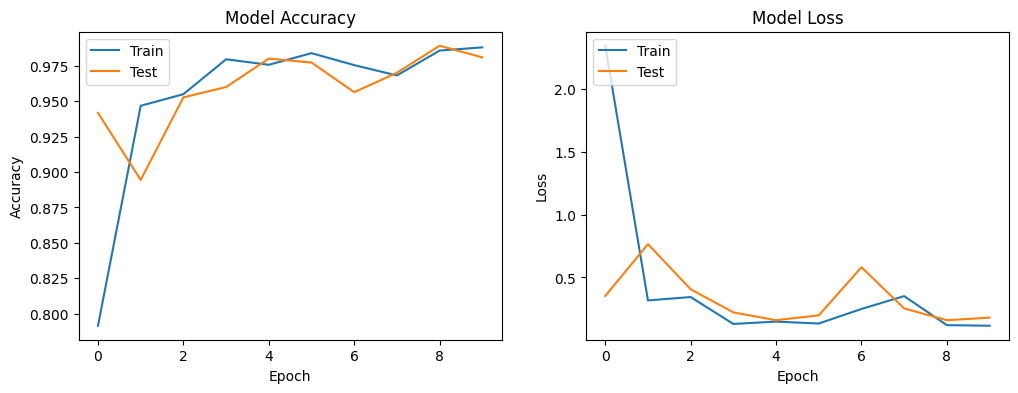

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step


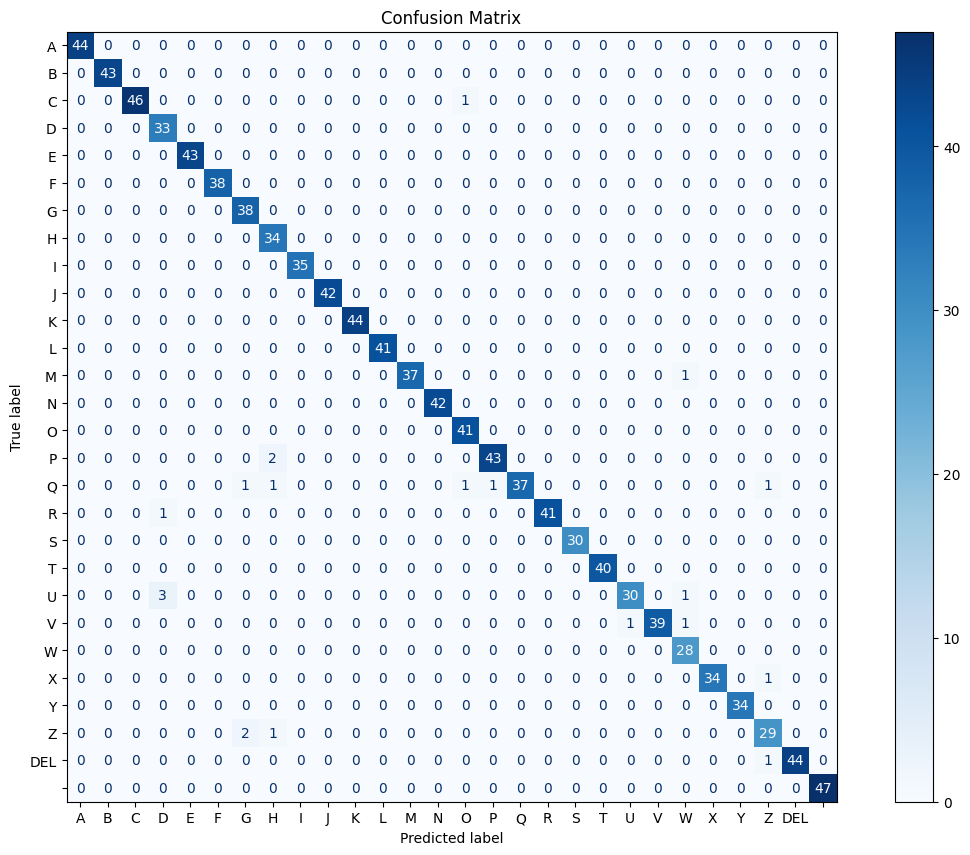

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        44
           B       1.00      1.00      1.00        43
           C       1.00      0.98      0.99        47
           D       0.89      1.00      0.94        33
           E       1.00      1.00      1.00        43
           F       1.00      1.00      1.00        38
           G       0.93      1.00      0.96        38
           H       0.89      1.00      0.94        34
           I       1.00      1.00      1.00        35
           J       1.00      1.00      1.00        42
           K       1.00      1.00      1.00        44
           L       1.00      1.00      1.00        41
           M       1.00      0.97      0.99        38
           N       1.00      1.00      1.00        42
           O       0.95      1.00      0.98        41
           P       0.98      0.96      0.97        45
           Q       1.00      0.88      0.94        42
    

In [11]:
# Build and train VGG19 model
vgg19_base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
build_and_train_model(vgg19_base_model, 'VGG19')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 44s 208ms/step - accuracy: 0.4977 - loss: 13.8229 - val_accuracy: 0.9107 - val_loss: 0.7988
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.8963 - loss: 1.0749 - val_accuracy: 0.9171 - val_loss: 0.7799
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9305 - loss: 0.7079 - val_accuracy: 0.9226 - val_loss: 0.6866
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9439 - loss: 0.7116 - val_accuracy: 0.8834 - val_loss: 1.3607
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9308 - loss: 0.7692 - val_accuracy: 0.8634 - val_loss: 3.4165
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.9403 - loss: 1.0164 - val_accuracy: 0.9344 - val_loss: 0.9260
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9561 - loss: 0.8113 - val_accuracy: 0.9663 - val_loss: 0.5525
Epoch 8/10
138/138 ━━━━━━━━━━━━

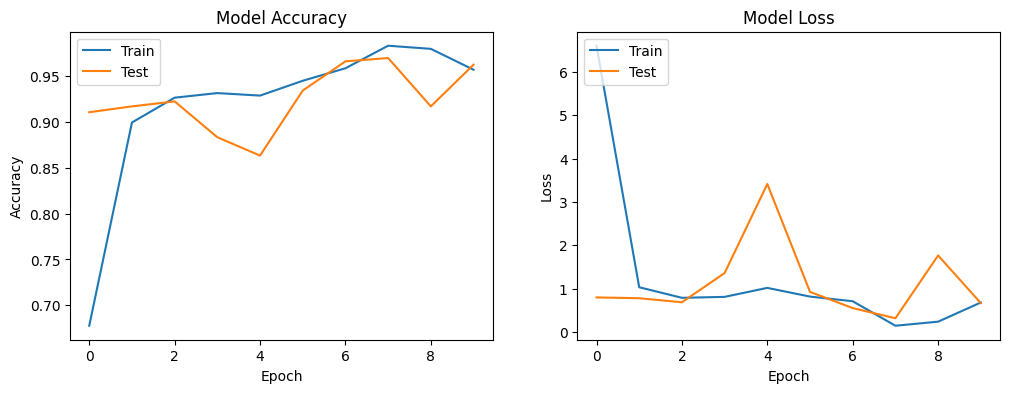

35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step


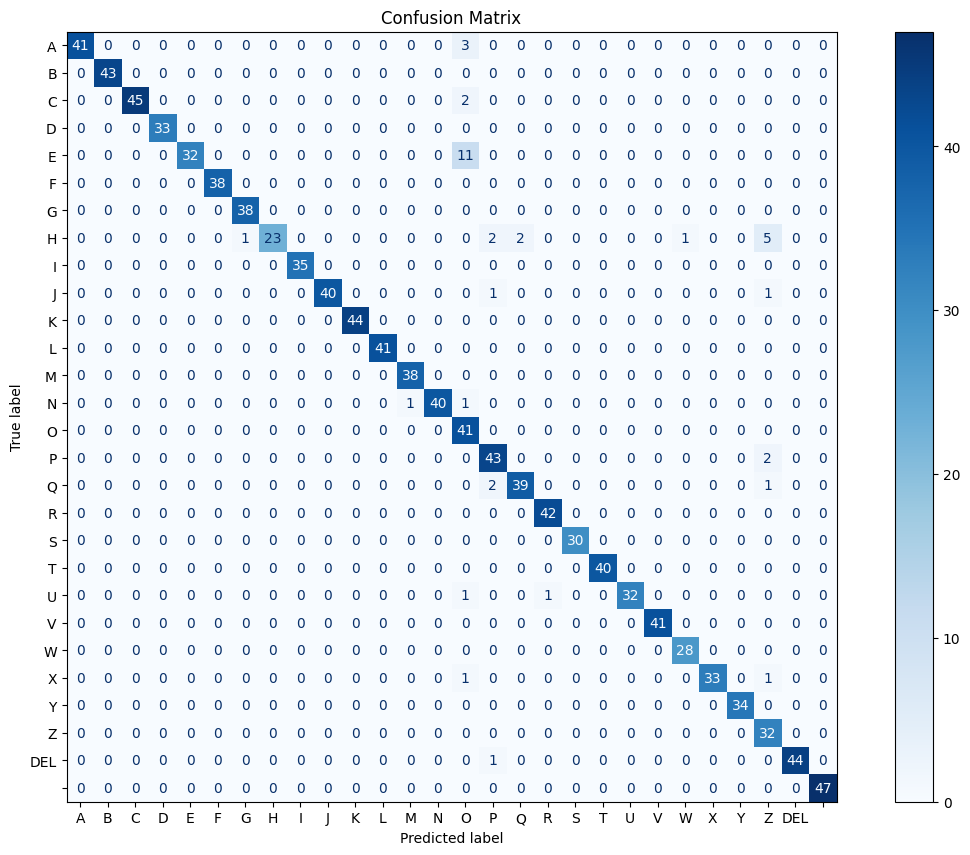

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.93      0.96        44
           B       1.00      1.00      1.00        43
           C       1.00      0.96      0.98        47
           D       1.00      1.00      1.00        33
           E       1.00      0.74      0.85        43
           F       1.00      1.00      1.00        38
           G       0.97      1.00      0.99        38
           H       1.00      0.68      0.81        34
           I       1.00      1.00      1.00        35
           J       1.00      0.95      0.98        42
           K       1.00      1.00      1.00        44
           L       1.00      1.00      1.00        41
           M       0.97      1.00      0.99        38
           N       1.00      0.95      0.98        42
           O       0.68      1.00      0.81        41
           P       0.88      0.96      0.91        45
           Q       0.95      0.93      0.94        42
    

In [12]:
# Build and train ResNet50 model
resnet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
build_and_train_model(resnet50_base_model, 'ResNet50')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 262ms/step - accuracy: 0.3733 - loss: 113.1171 - val_accuracy: 0.8461 - val_loss: 7.9875
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8308 - loss: 10.0205 - val_accuracy: 0.8224 - val_loss: 12.5259
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8895 - loss: 5.9618 - val_accuracy: 0.8543 - val_loss: 9.9737
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9026 - loss: 5.9904 - val_accuracy: 0.8643 - val_loss: 12.8119
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9147 - loss: 5.4456 - val_accuracy: 0.9144 - val_loss: 5.6799
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9231 - loss: 5.6356 - val_accuracy: 0.9262 - val_loss: 4.6966
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9397 - loss: 4.8023 - val_accuracy: 0.9199 - val_loss: 7.2080
Epoch 8/10
138/138 ━━━━━━━━━━━━━━

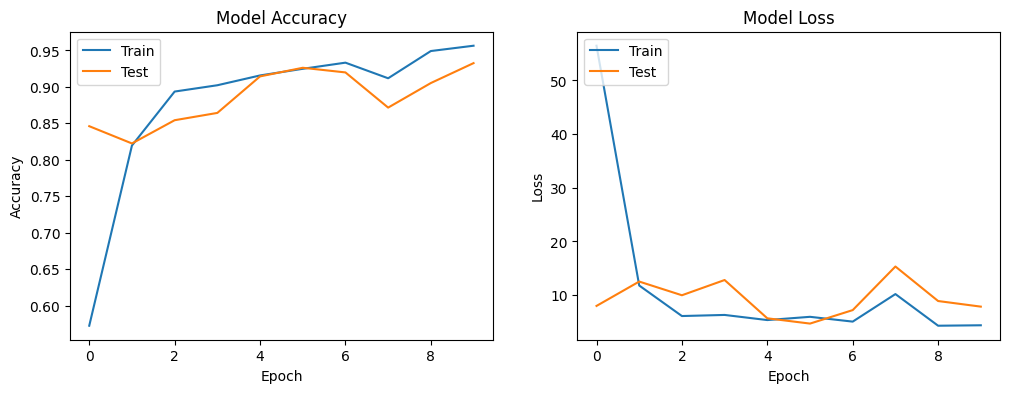

35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step


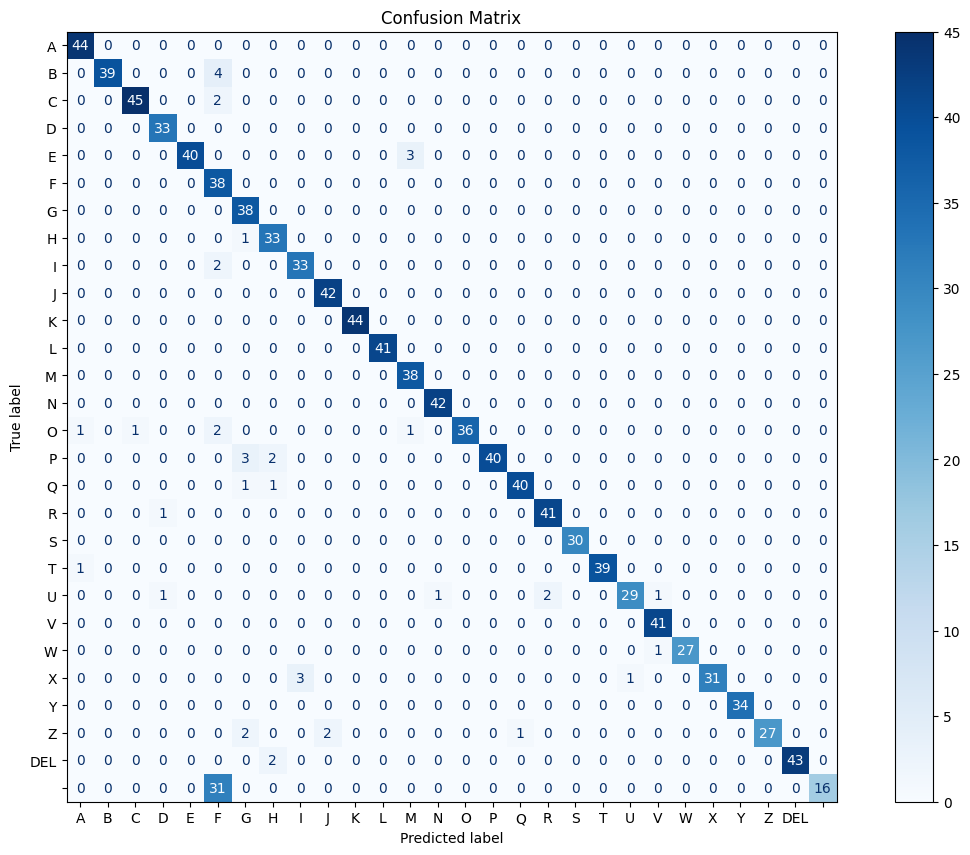

Classification Report:
              precision    recall  f1-score   support

           A       0.96      1.00      0.98        44
           B       1.00      0.91      0.95        43
           C       0.98      0.96      0.97        47
           D       0.94      1.00      0.97        33
           E       1.00      0.93      0.96        43
           F       0.48      1.00      0.65        38
           G       0.84      1.00      0.92        38
           H       0.87      0.97      0.92        34
           I       0.92      0.94      0.93        35
           J       0.95      1.00      0.98        42
           K       1.00      1.00      1.00        44
           L       1.00      1.00      1.00        41
           M       0.90      1.00      0.95        38
           N       0.98      1.00      0.99        42
           O       1.00      0.88      0.94        41
           P       1.00      0.89      0.94        45
           Q       0.98      0.95      0.96        42
    

In [13]:
# Build and train InceptionV3 model
inceptionv3_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
build_and_train_model(inceptionv3_base_model, 'InceptionV3')